## I am working on creating the model for tensorflow. I have combined all the test and train images into one folder and pasing then to my tensorflow model where it tries to train with the data samples and after creating my model, I pass the images from test folder to see how my MODEL is Working. 

In [10]:
train_dir = r'C:\Users\Reshmi\Capstone-Project\milestone2\stratified_sampling\output_images\train'
test_dir = r'C:\Users\Reshmi\Capstone-Project\milestone2\stratified_sampling\output_images\test'

## I am installing tensorflow from PIP package.
https://www.tensorflow.org/

In [7]:
#pip install tensorflow

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 85 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Reshmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#pip install --force-reinstall --no-cache-dir Pillow
#!pip install scipy



In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


c:\Users\Reshmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0991 - loss: -36.5840

c:\Users\Reshmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.0978 - loss: -45.9788 - val_accuracy: 0.0714 - val_loss: -269.6869
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0802 - loss: -264.4627 - val_accuracy: 0.0714 - val_loss: -596.1574
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1007 - loss: -851.5629 - val_accuracy: 0.0714 - val_loss: -1127.2185
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0724 - loss: -1228.0013 - val_accuracy: 0.0714 - val_loss: -1828.1361
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0835 - loss: -1687.3707 - val_accuracy: 0.0714 - val_loss: -2741.4216
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0959 - loss: -3515.3843 - val_accuracy: 0.0714 - val_loss: -3920.9067
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0631 - loss: -4309.2510 - val_accuracy: 0.0714 - val_loss: -5391.1968
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0710 - loss: -5003.5195 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

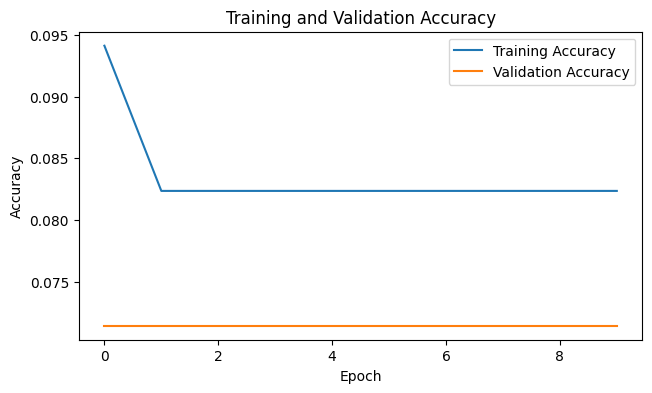

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

## I am trying to install all the necessary  Dependencies

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Image: 18.jpg → Predicted: caries


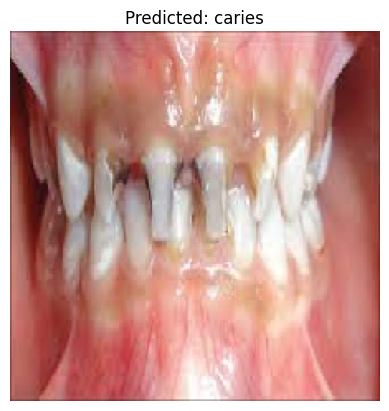

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: 39.jpg → Predicted: caries


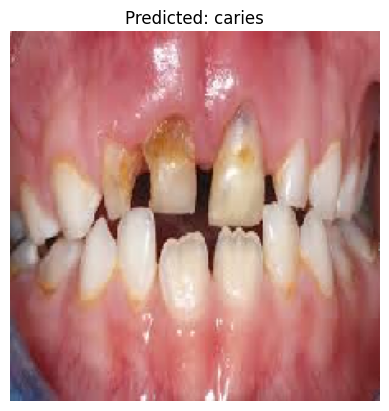

In [15]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model  
from tensorflow.keras.applications.imagenet_utils import decode_predictions  
import matplotlib.pyplot as plt

test_folder = r'C:\Users\Reshmi\Capstone-Project\milestone2\stratified_sampling\output_images\predict_images'  
img_height, img_width = 224, 224  
class_names = ['caries', 'no_caries']

for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)

    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if you did that during training

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_class = class_names[predicted_index]

    print(f"Image: {img_name} → Predicted: {predicted_class}")
    # Optional: show image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [ ]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------- ------------------- 4.2/8.1 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 23.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
